Predict the employee turnover using logistic regression and random forest classification model .
Checkpoints
1)Transform categorical variables to dummies
2)Evaluate logistic regression and get confusion matrix
3)Evaluate random forest model and get confusion matrix
4)Compare roc curves for both models and see which performs better
5)Try to do transformations with dataset and see if improvements are happening in results (Logarithm transformation, scaling, etc)


In [23]:
# Importing modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

In [24]:
# Importing the dataset
empturn_df = pd.read_csv("HR_comma_sep.csv")
empturn_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [25]:
empturn_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [26]:
empturn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
# Shuffling the data
shuffled_df = empturn_df.reindex(np.random.permutation(empturn_df.index))
shuffled_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
9210,0.91,0.88,5,223,3,0,0,0,support,low
14757,0.37,0.47,2,149,3,0,1,0,sales,low
9561,0.80,0.50,3,219,3,0,0,0,sales,low
13326,0.13,0.97,4,162,6,0,0,0,sales,low
9028,0.52,0.57,5,162,3,0,0,0,sales,low
5927,0.72,0.39,5,111,5,0,0,0,support,low
11108,0.95,0.80,3,225,2,0,0,0,sales,high
2926,0.82,0.84,3,139,2,1,0,0,sales,low
12225,0.90,0.97,4,258,5,0,1,0,accounting,low
11006,0.80,0.81,5,248,2,1,0,0,RandD,low


In [28]:
# Turning categorical values into numerical ones
num_df = pd.get_dummies(shuffled_df)
num_df.head(8)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
9210,0.91,0.88,5,223,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14757,0.37,0.47,2,149,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9561,0.80,0.50,3,219,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13326,0.13,0.97,4,162,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9028,0.52,0.57,5,162,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5927,0.72,0.39,5,111,5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11108,0.95,0.80,3,225,2,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2926,0.82,0.84,3,139,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
# Droping 'left' column to get feature variables
X = num_df.drop('left', axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
9210,0.91,0.88,5,223,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14757,0.37,0.47,2,149,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9561,0.80,0.50,3,219,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
13326,0.13,0.97,4,162,6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9028,0.52,0.57,5,162,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851,0.85,0.66,4,155,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
11219,0.48,0.42,2,275,6,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
8979,0.40,0.45,4,113,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6798,0.39,1.00,5,204,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [30]:
# Getting label variable
Y = num_df['left']
Y

9210     0
14757    1
9561     0
13326    0
9028     0
        ..
12851    0
11219    0
8979     0
6798     0
11407    0
Name: left, Length: 14999, dtype: int64

In [31]:
# Splitting into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
2193,1.00,0.66,4,180,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8086,0.78,0.66,6,105,5,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
13846,0.59,0.73,4,247,10,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9245,0.52,0.82,4,198,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8476,0.90,0.50,4,139,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,0.35,0.56,4,142,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
761,0.09,0.93,6,249,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
14020,0.93,0.51,4,110,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6692,0.80,0.38,3,215,6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [35]:
# Creating logistic regression model
emplog = LogisticRegression(max_iter=500)
emplog.fit(x_train, y_train)
emplog.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

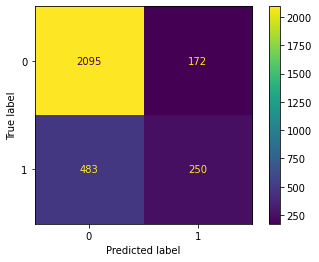

In [39]:
# Creating confusion matrix for logistic regression on test data
ConfusionMatrixDisplay.from_predictions(y_test, emplog.predict(x_test))
plt.show()

In [40]:
# Creating random forest model
empfor = RandomForestClassifier()
empfor.fit(x_train, y_train)
empfor.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])

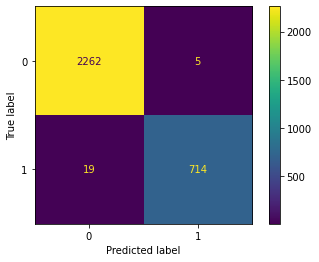

In [41]:
# Confusion matrix for random forest model on test data
ConfusionMatrixDisplay.from_predictions(y_test, empfor.predict(x_test))
plt.show()

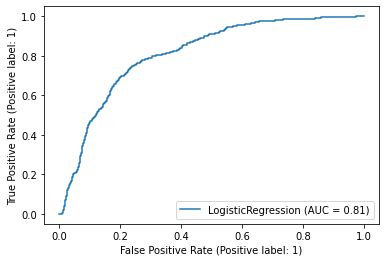

In [42]:
# Getting ROC curve for logistic regression
RocCurveDisplay.from_estimator(emplog, x_test, y_test)
plt.show()

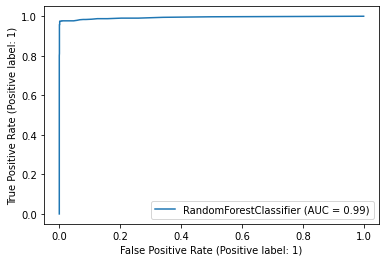

In [43]:
# ROC curve for random forest
RocCurveDisplay.from_estimator(empfor, x_test, y_test)
plt.show()